# Model 2


In [1]:
# Packages
import sys
import os
# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))
# Import module
from Logistic_Regression_Functions import *

# Model name
model_name = 'smote_rating_change_model_2'

In [2]:
# Load the data
df = load_data()

In [3]:
# Get the column names and mapping
numeric_feature_columns, cat_feature_columns, target_column, custom_mapping = get_column_names_and_mapping_change(model_name)

In [4]:
# Create matrices
X_train_scaled, X_test_scaled, y_train, y_test, _ = prepare_matrices(df, numeric_feature_columns, cat_feature_columns, target_column, custom_mapping)

feature names: 
['num__EBIT' 'num__common_plus_preferred_stock' 'num__workingCapital'
 'num__Ratio_A' 'num__Ratio_B' 'num__Ratio_C' 'num__Ratio_D'
 'num__Ratio_E' 'num__cashAndCashEquivalents' 'num__shortTermInvestments'
 'num__cashAndShortTermInvestments' 'num__netReceivables'
 'num__inventory_balance_sheet' 'num__otherCurrentAssets'
 'num__totalCurrentAssets' 'num__propertyPlantEquipmentNet'
 'num__goodwill' 'num__intangibleAssets'
 'num__goodwillAndIntangibleAssets' 'num__longTermInvestments'
 'num__taxAssets' 'num__otherNonCurrentAssets'
 'num__totalNonCurrentAssets' 'num__otherAssets' 'num__totalAssets'
 'num__accountPayables' 'num__shortTermDebt' 'num__taxPayables'
 'num__deferredRevenue' 'num__otherCurrentLiabilities'
 'num__totalCurrentLiabilities' 'num__longTermDebt'
 'num__deferredRevenueNonCurrent' 'num__deferredTaxLiabilitiesNonCurrent'
 'num__otherNonCurrentLiabilities' 'num__totalNonCurrentLiabilities'
 'num__otherLiabilities' 'num__capitalLeaseObligations'
 'num__totalLi

In [5]:
#SMOTE
from imblearn.over_sampling import SMOTE
unique, count = np.unique(y_train, return_counts=True)
dict_value_count = {k:v for (k, v) in zip(unique, count)}
print(dict_value_count)
sm = SMOTE(sampling_strategy={-1:2000, 1: 2000})
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)
unique, count = np.unique(y_train_sm, return_counts=True)
dict_value_count = {k:v for (k, v) in zip(unique, count)}
print(dict_value_count)

{-1: 100, 0: 4156, 1: 135}
{-1: 2000, 0: 4156, 1: 2000}


In [6]:
# Train model
best_model = train_model_with_grid_search(X_train_sm, y_train_sm, model_name)

Tuned hyperparameters: {'C': 1, 'class_weight': None, 'l1_ratio': 0.5, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'saga'}
Train accuracy of best model:  0.6597596861206474
Best mean CV accuracy: 0.5972278825693367
Coefficients: [[ 1.66193798e-01  1.57857117e-01 -2.03086918e-01  3.90770957e-01
  -3.28476545e-01  2.89488370e-01 -4.46733810e-02  5.58914540e-01
  -3.74076762e-01 -2.29273197e-01  0.00000000e+00 -9.39562740e-02
   3.93492246e-01 -8.65140847e-02 -5.17046825e-01  5.42515234e-01
   5.53981122e-01 -2.32949355e-01 -3.72548571e-01 -1.35320565e-02
  -4.06606360e-01  4.87482480e-02  2.65049993e-01  2.97428754e-01
  -2.27258529e-01  2.78817198e-01  2.23761546e-01  3.99038599e-01
  -1.73268952e-01 -5.35648039e-03 -4.42733231e-01  1.36355848e+00
   2.51509085e-02 -2.20616451e-01 -1.63338875e-01  3.44959023e-01
  -6.84279122e-01 -1.37680054e+00 -1.11134224e+00 -1.10048144e-01
   1.68415283e-01 -3.96851775e-01 -3.33819126e-01 -1.63317978e-01
   3.43846455e-01  6.65051035e-0

In [7]:
# Get predictions
get_model_predictions(best_model, X_test_scaled, y_test, custom_mapping, model_name, target_column, df)

X_test_scaled shape
(1118, 166)
y_test shape
(1118,)
accuracy: 0.7003577817531306
share of correct predictions: 0.7003577817531306
assertion that they match:


{'accuracy': 0.7003577817531306, 'f1_score': 0.7894981767964322, 'majority_baseline': 0.9534883720930233}
Share of predictions exactly as the actual: 70.04%
Share of predictions 1 or fewer ratings away from actual: 99.19%
classification report:
                                         precision    recall  f1-score   support

Downgrade Since Last Fixed Quarter Date     0.0072    0.0500    0.0127        20
        Same As Last Fixed Quarter Date     0.9512    0.7317    0.8271      1066
  Upgrade Since Last Fixed Quarter Date     0.0125    0.0625    0.0208        32

                               accuracy                         0.7004      1118
                              macro avg     0.3237    0.2814    0.2869      1118
                           weighted avg     0.9075    0.7004    0.7895      1118

counts of y_test values
Change Direction Since Last Fixed Quarter Date
Same As Last Fixed Quarter Date            1066
Upgrade Since Last Fixed Quarter Date        32
Downgrade Since La

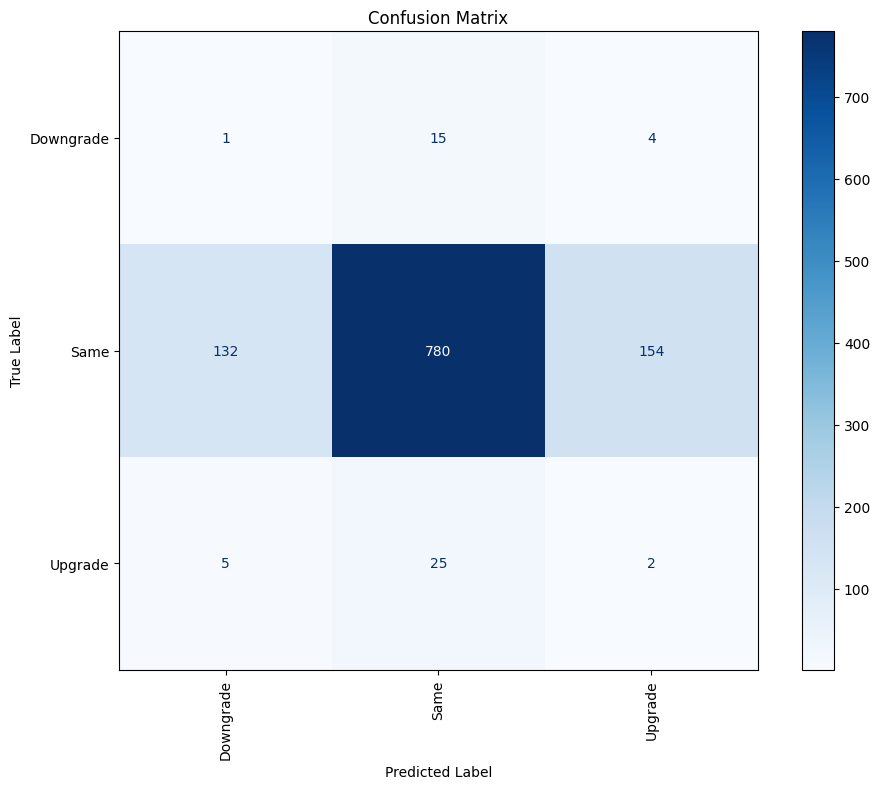

In [8]:
create_model_figure_and_table_components(model_name, target_column, custom_mapping)